In [13]:
# Third party imports
import torch
from torchvision import transforms

from PIL import Image
import matplotlib.pyplot as plt

In [22]:
# Data preprocessing details
data_transforms = {
	'train': transforms.Compose([
		transforms.Resize((256, 256)),
		transforms.ToTensor(),
		transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
	]),
	'val': transforms.Compose([
		transforms.Resize((256, 256)),
		transforms.ToTensor(),
		transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
	]),
}

In [23]:
texture = data_transforms["train"](Image.open("./atlas_texture.jpg"))
texture.shape

torch.Size([3, 256, 256])

In [24]:
texture_batch = torch.stack([texture, texture])
texture_batch.shape

torch.Size([2, 3, 256, 256])

In [25]:
first_unfold = texture_batch.unfold(2, 64, 64)
first_unfold.shape

torch.Size([2, 3, 4, 256, 64])

In [29]:
second_unfold = first_unfold.unfold(3, 42, 42)
second_unfold.shape

torch.Size([2, 3, 4, 6, 64, 42])

In [32]:
third_fold = second_unfold.reshape(2, 3, 24, 64, 42)
third_fold.shape

torch.Size([2, 3, 24, 64, 42])

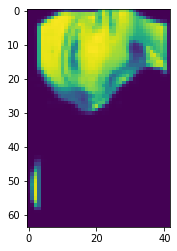

In [34]:
plt.imshow(third_fold[0][0][23])

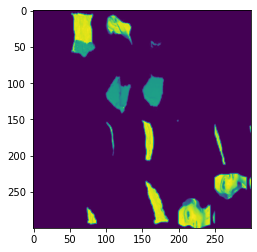

In [19]:
plt.imshow(texture_batch[0][0].numpy())

In [36]:
import math

In [38]:
math.floor(256/6)

42

In [11]:
a = torch.rand(20, 20)

In [16]:
torch.split(a, [5, 5])[0].shape

RuntimeError: split_with_sizes expects split_sizes to sum exactly to 20 (input tensor's size at dimension 0), but got split_sizes=[5, 5]